In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from cryp import *

In [3]:
df = pd.read_csv('../data/datacorr_6m6y18mMw1w24_final.csv', sep=';')
df.TPn.unique()

array(['6m', '6y', 'Mor w1', 'Mor w24', '18mth', '6yrep'], dtype=object)

In [4]:
df.index = pd.Series(df.ABCno.astype(str) + '_' + df.TPn.astype(str))

In [6]:
set(df.columns)

{'(14 or 15)-methylpalmitate (a17:0 or i17:0)_Fatty Acid, Branched_Lipid',
 '(16 or 17)-methylstearate (a19:0 or i19:0)_Fatty Acid, Branched_Lipid',
 '(2 or 3)-decenoate (10:1n7 or n8)_Medium Chain Fatty Acid_Lipid',
 '(N(1) + N(8))-acetylspermidine_Polyamine Metabolism_Amino Acid',
 '(R)-3-hydroxybutyrylcarnitine_Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)_Lipid',
 '(S)-3-hydroxybutyrylcarnitine_Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)_Lipid',
 '(S)-a-amino-omega-caprolactam_Food Component/Plant_Xenobiotics',
 '1,2,3-benzenetriol sulfate (2)_Chemical_Xenobiotics',
 '1,2-dilinoleoyl-GPC (18:2/18:2)_Phosphatidylcholine (PC)_Lipid',
 '1,2-dilinoleoyl-GPE (18:2/18:2)*_Phosphatidylethanolamine (PE)_Lipid',
 '1,2-dipalmitoyl-GPC (16:0/16:0)_Phosphatidylcholine (PC)_Lipid',
 '1,3,7-trimethylurate_Xanthine Metabolism_Xenobiotics',
 '1,5-anhydroglucitol (1,5-AG)_Glycolysis, Gluconeogenesis, and Pyruvate Metabolism_Carbohydrate',
 '1,7-dimethylurate_Xanthine Metabolism_Xenobiotics',


In [7]:
df.filter(regex='xan').columns

Index(['xanthurenate_Tryptophan Metabolism_Amino Acid',
       'paraxanthine_Xanthine Metabolism_Xenobiotics',
       'hypoxanthine_Purine Metabolism, (Hypo)Xanthine/Inosine containing_Nucleotide',
       'xanthine_Purine Metabolism, (Hypo)Xanthine/Inosine containing_Nucleotide',
       'hexanoylcarnitine (C6)_Fatty Acid Metabolism (Acyl Carnitine, Medium Chain)_Lipid',
       '3-methylxanthine_Xanthine Metabolism_Xenobiotics',
       '1-methylxanthine_Xanthine Metabolism_Xenobiotics',
       '3-hydroxyhexanoate_Fatty Acid, Monohydroxy_Lipid',
       'hexanoylglutamine_Fatty Acid Metabolism (Acyl Glutamine)_Lipid',
       'beta-cryptoxanthin_Vitamin A Metabolism_Cofactors and Vitamins'],
      dtype='object')

In [8]:
df = df[df.TPn.isin(['6m', '6y', 'Mor w1', 'Mor w24', '18mth'])]

In [10]:
def trychange(x):
    try:
        return float(x.replace(',','.'))
    
    except:
        return x
def retshape(x):
    return print(x)

In [12]:
df_numerical =df.iloc[:,6:].applymap(trychange)
df_numerical.min()

linoleate (18:2n6)_Long Chain Polyunsaturated Fatty Acid (n3 and n6)_Lipid          5.529973e+07
allantoin_Purine Metabolism, (Hypo)Xanthine/Inosine containing_Nucleotide           1.240628e+06
arachidonate (20:4n6)_Long Chain Polyunsaturated Fatty Acid (n3 and n6)_Lipid       9.931932e+06
deoxycholate_Secondary Bile Acid Metabolism_Lipid                                   1.324537e+05
arachidate (20:0)_Long Chain Saturated Fatty Acid_Lipid                             6.641684e+06
                                                                                        ...     
glycoursodeoxycholic acid sulfate (1)_Secondary Bile Acid Metabolism_Lipid          2.097965e+04
vanillic acid glycine_Food Component/Plant_Xenobiotics                              8.625034e+03
4-chlorobenzoic acid_Chemical_Xenobiotics                                           1.077422e+05
2-O-methylascorbic acid_Ascorbate and Aldarate Metabolism_Cofactors and Vitamins    5.168722e+05
phenylalanine_Phenylalanine Me

<Axes: >

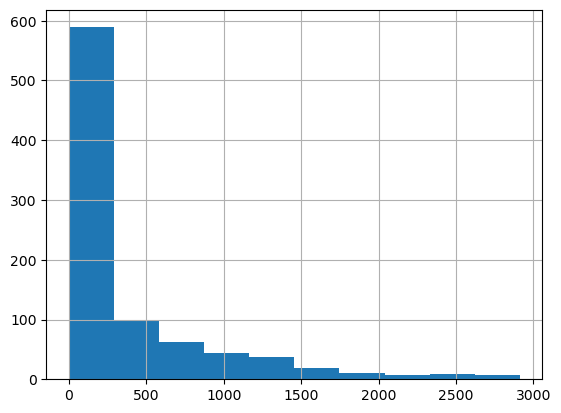

In [13]:
df_numerical.isnull().sum().sort_values().hist()

In [14]:
print(df_numerical.shape)
kickout = df_numerical.isnull().sum()[df_numerical.isnull().sum()>(len(df_numerical)*.33)].index.tolist()
df_numerical.drop(kickout, axis=1, inplace=True)
print(df_numerical.shape)

(3132, 884)
(3132, 780)


In [15]:
min_values = df_numerical.min().div(10, axis=0)
min_values

linoleate (18:2n6)_Long Chain Polyunsaturated Fatty Acid (n3 and n6)_Lipid                                                             5.529973e+06
allantoin_Purine Metabolism, (Hypo)Xanthine/Inosine containing_Nucleotide                                                              1.240629e+05
arachidonate (20:4n6)_Long Chain Polyunsaturated Fatty Acid (n3 and n6)_Lipid                                                          9.931932e+05
arachidate (20:0)_Long Chain Saturated Fatty Acid_Lipid                                                                                6.641683e+05
margarate (17:0)_Long Chain Saturated Fatty Acid_Lipid                                                                                 6.702562e+05
                                                                                                                                           ...     
branched-chain, straight-chain, or cyclopropyl 12:1 fatty acid*_Partially Characterized Molecules_Partially Char

In [16]:
df_num_filled = df_numerical.fillna(min_values, axis=0)

# continue

In [17]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [19]:
df_children = df_num_filled[df.TPn.isin(['6m', '6y', '18mth'])]
converted_children = pd.DataFrame(mm.fit_transform(df_children), 
                         index=df_children.index, 
                         columns=df_children.columns)
converted_children.index.duplicated().any()

False

In [20]:
df_moms = df_num_filled[df.TPn.isin(['Mor w1', 'Mor w24'])]
converted_moms = pd.DataFrame(mm.fit_transform(df_moms), 
                         index=df_moms.index, 
                         columns=df_moms.columns)
converted_moms.index.duplicated().any()

False

In [21]:
converted = pd.concat([converted_children, converted_moms])

<Axes: >

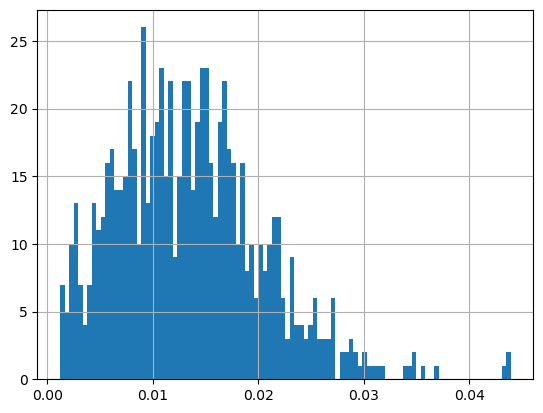

In [22]:
varc = converted.var()
varc.hist(bins=100)

In [23]:
varc.describe()

count    780.000000
mean       0.013483
std        0.006946
min        0.001200
25%        0.008170
50%        0.013056
75%        0.017513
max        0.043942
dtype: float64

In [24]:
selected_metabs = varc[varc>varc.quantile(.1)].index

In [ ]:
def kick_corr(in_df, corr_th=0.90):
    '''
    Removes correlated featurs above 0.95
    :param in_df: Dataframe of features
    :param corr_th: Correlation Threshold
    :return: Dataframe without correlated features
    '''
    corr_matrix = in_df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > corr_th)]
    no_corr_df = in_df.drop(to_drop, axis=1)
    return no_corr_df
clearn_conver = kick_corr(converted[selected_metabs])

In [ ]:
clearn_conver.shape

In [40]:
clearn_conver['TPn'] = df.TPn
clearn_conver['ABCno'] = df.ABCno